<center><font size = "10"> Week 12 - Network Simulation III<center>
<center><font size = "8">Tutorial 01: Simple Network  <center>

<font size='5'><font color='red'>__IMPORTANT!!__ Read the document "ReadBefore.pdf" before running this tutorial or any of the week 12 tutorials

<font size='3'><font color='blue'> This tutorial provides an overview of how to use the [NetPyNE](http://www.netpyne.org/about.html) python package to create a simple network.
    
<font size='3'>__NetPyNE__ (Networks using Python and NEURON) is a Python package to facilitate the development, simulation, parallelization, and analysis of biological neuronal networks using the NEURON simulator.

## Step 1: Import
<font size='3'>Import the __sim__ and __specs__ modules from the __netpyne__ package, that provide functions to easily create and simulate networks.

In [1]:
from netpyne import specs, sim

%matplotlib inline

## Step 2: Define network parameters

In [2]:
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

### 2.1 Define cell populations

In [3]:
# Population parameters
netParams.popParams['cell1'] = {'cellType': 'PYR', 'numCells': 20, 'cellModel': 'HH'}
netParams.popParams['cell2'] = {'cellType': 'PYR', 'numCells': 20, 'cellModel': 'HH'}

### 2.2 Define cell morphologies and physiology

In [4]:
## Cell property rules
cellRule = {'conds': {'cellType': 'PYR'},  'secs': {}}  # cell rule dict
cellRule['secs']['soma'] = {'geom': {}, 'mechs': {}}   # soma params dict
cellRule['secs']['soma']['geom'] = {'diam': 18.8, 'L': 18.8, 'Ra': 123.0}  # soma geometry
cellRule['secs']['soma']['mechs']['hh'] = {'gnabar': 0.12, 'gkbar': 0.036, 'gl': 0.003, 'el': -70} # soma hh mechanism
netParams.cellParams['PYRrule'] = cellRule # add dict to list of cell params

### 2.3 Define synaptic mechanism

In [5]:
## Synaptic mechanism parameters
netParams.synMechParams['exc'] = {'mod': 'Exp2Syn', 'tau1': 0.1, 'tau2': 5.0, 'e': 0}  # excitatory synaptic mechanism

### 2.4 Stimulation

In [6]:
# Stimulation parameters
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 10, 'noise': 0.5}
netParams.stimTargetParams['bkg->PYR'] = {'source': 'bkg', 'conds': {'cellType': 'PYR'}, 'weight': 0.01, 'delay': 5, 'synMech': 'exc'}

### 2.5 Connectivity

In [7]:
## Cell connectivity rules
netParams.connParams['cell2->cell1'] = { #  cell2 -> cell1 label
    'preConds': {'pop': 'cell2'},        # conditions of presyn cells
    'postConds': {'pop': 'cell1'},       # conditions of postsyn cells
    'divergence': 12,                    # probability of connection
    'weight': 0.01,                      # synaptic weight
    'delay': 5,                          # transmission delay (ms)
    'synMech': 'exc'}                    # synaptic mechanism

## Step 3: Simulation parameters

In [8]:
# Simulation options
simConfig = specs.SimConfig()       # object of class SimConfig to store simulation configuration

simConfig.duration = 1*1e3          # Duration of the simulation, in ms
simConfig.dt = 0.025                # Internal integration timestep to use
simConfig.verbose = False           # Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}  # Dict with traces to record
simConfig.recordStep = 0.1          # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output' # Set file output name
simConfig.savePickle = False        # Save params, network and sim output to pickle file
simConfig.saveJson = True 

# Plots
simConfig.analysis['plotRaster'] = True               # Plot a raster
simConfig.analysis['plotTraces'] = {'include': [1]}   # Plot recorded traces for this list of cells
simConfig.analysis['plot2Dnet'] = True                # plot 2D visualization of cell positions and connections

## Step 4: Create and simulate


Start time:  2020-05-25 01:35:41.960759

Creating network of 2 cell populations on 1 hosts...
  Number of cells on node 0: 40 
  Done; cell creation time = 0.07 s.
Making connections...
  Number of connections on node 0: 240 
  Done; cell connection time = 0.02 s.
Adding stims...
  Number of stims on node 0: 40 
  Done; cell stims creation time = 0.01 s.
Recording 1 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 1.45 s; real-time ratio: 0.69.

Gathering data...
  Done; gather time = 0.03 s.

Analyzing...
  Cells: 40
  Connections: 280 (7.00 per cell)
  Spikes: 960 (24.00 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 1.45 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 0.34 s.
Plotting raster...


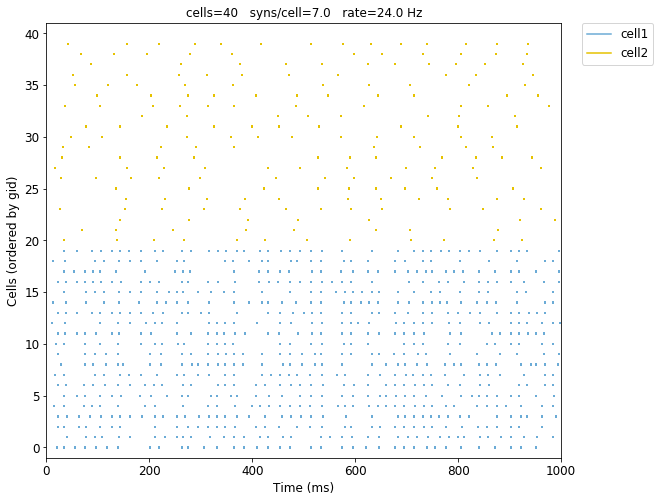

Plotting recorded cell traces ... cell


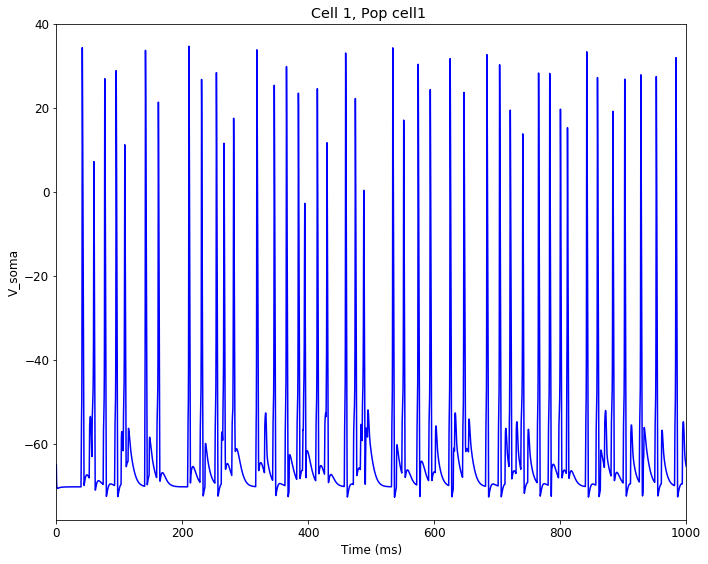

Plotting 2D representation of network cell locations and connections...


In [ ]:
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)